In [1]:
import pandas as pd
import json
import matplotlib.pyplot as plt

In [2]:
images_prefix = "../docs/static/"

In [3]:
tiny_data = pd.read_parquet("../test_data_tiny")

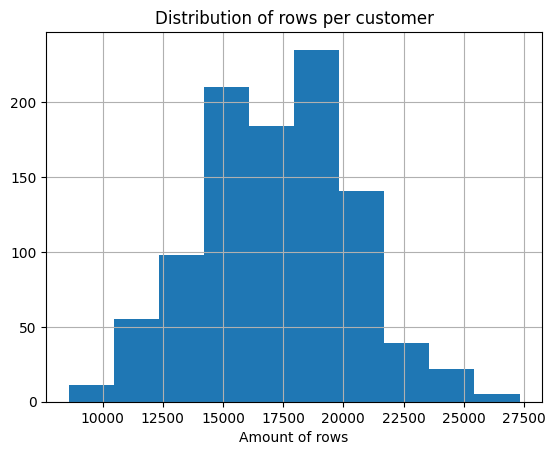

In [4]:
tiny_data["customer_id"].value_counts().hist()
f = plt.gcf()
ax = f.get_axes()[0]
ax.set_xlabel("Amount of rows")
ax.set_title("Distribution of rows per customer")
f.savefig(f"{images_prefix}rows_per_key.png")

In [5]:
tiny_data["card_type"].value_counts()

card_type
DC    12972530
CC     4326925
Name: count, dtype: int64

In [6]:
tiny_data["channel"].value_counts()

channel
web       12976058
mobile     4323397
Name: count, dtype: int64

In [7]:
results_tiny = json.load(open("../results/results_tiny.json", "r"))
results_small = json.load(open("../results/results_small.json", "r"))
results_medium = json.load(open("../results/results_medium.json", "r"))

In [8]:
def clean_ooms(dct):
    for k in dct:
        if dct[k] == -1:
            dct[k] = 0

clean_ooms(results_tiny)
clean_ooms(results_small)
clean_ooms(results_medium)

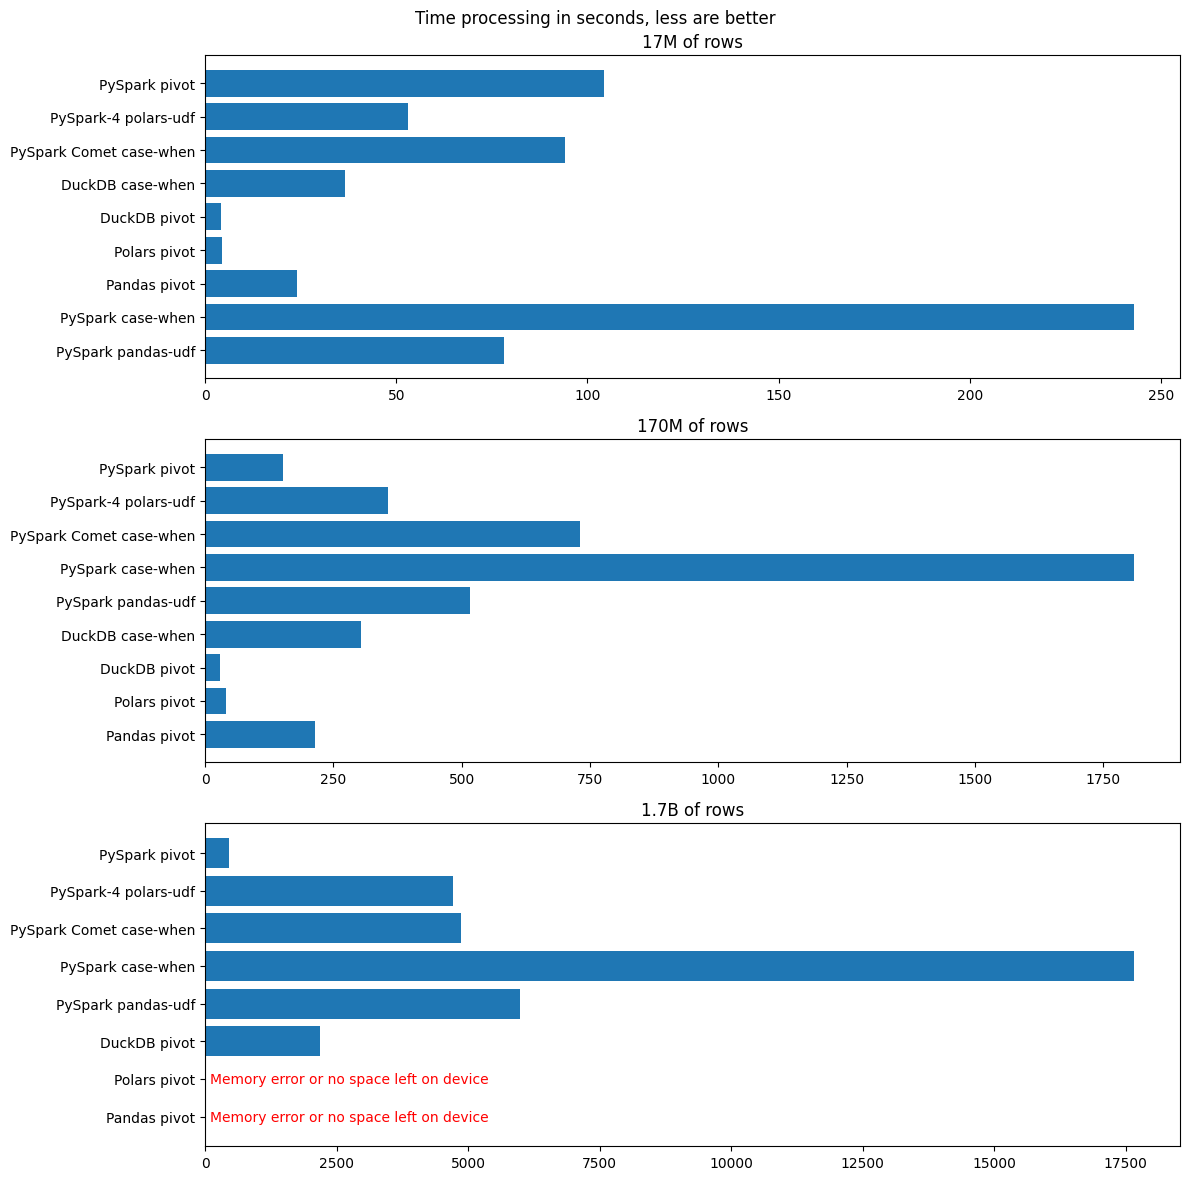

In [9]:
f, ax = plt.subplots(nrows=3, ncols=1, figsize=(12, 12))

f.suptitle("Time processing in seconds, less are better")

y_pos = list(range(len(results_tiny)))
ax[0].set_title("17M of rows")
ax[0].barh(y_pos, [v for _, v in results_tiny.items()], align="center")
ax[0].set_yticks(y_pos, results_tiny.keys())
for i, kk in enumerate(results_medium):
    if results_tiny[kk] == 0:
        # Inspired by https://stackoverflow.com/a/30229062
        ax[0].text(100, i, "Memory error or no space left on device", color="red", verticalalignment="center")

y_pos = list(range(len(results_small)))
ax[1].set_title("170M of rows")
ax[1].barh(y_pos, [v for _, v in results_small.items()], align="center")
ax[1].set_yticks(y_pos, results_small.keys())
for i, kk in enumerate(results_medium):
    if results_small[kk] == 0:
        # Inspired by https://stackoverflow.com/a/30229062
        ax[1].text(100, i, "Memory error or no space left on device", color="red", verticalalignment="center")

y_pos = list(range(len(results_medium)))
ax[2].set_title("1.7B of rows")
ax[2].barh(y_pos, [v for _, v in results_medium.items()], align="center")
ax[2].set_yticks(y_pos, results_medium.keys())
for i, kk in enumerate(results_medium):
    if results_medium[kk] == 0:
        # Inspired by https://stackoverflow.com/a/30229062
        ax[2].text(100, i, "Memory error or no space left on device", color="red", verticalalignment="center")

f.tight_layout()

f.savefig(f"{images_prefix}results_overview.png")